loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
/opt/ml/dataset/test/2644.jpg


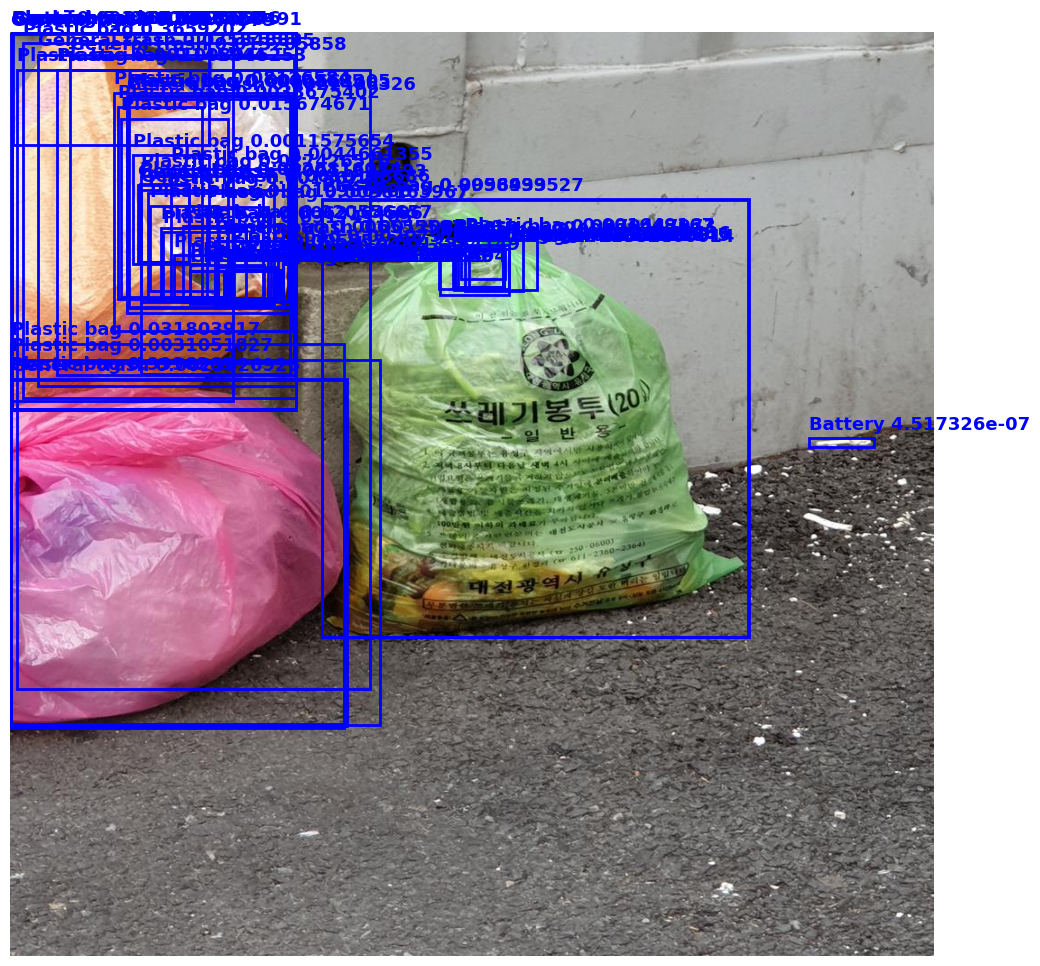

In [65]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io
import os
from pycocotools.coco import COCO
import pandas as pd
import numpy as np

classes = [ "General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing" ]


test_json = '/opt/ml/dataset/test.json'
test_coco = COCO(test_json)

submission_file = '/opt/ml/level2_objectdetection_cv-level2-cv-15/mmdetection/ensemble_55.csv'
submission_file2 = '/opt/ml/level2_objectdetection_cv-level2-cv-15/mmdetection/cascade_rcnn_swin_fold1.csv'

index_ = random.randrange(4871) # 테스트 이미지 개수 (특정 이미지 인덱스 적어도 됨)
index_ = 9


df = pd.read_csv(submission_file)
data = df['PredictionString']
image_name = df['image_id']
file_name = '/opt/ml/dataset/test/'+str(index_).zfill(4) + '.jpg'

df2 = pd.read_csv(submission_file2)
data2 = df2['PredictionString']
image_name = df2['image_id']
file_name = '/opt/ml/dataset/test/'+str(index_).zfill(4) + '.jpg'


# I = io.imread(os.path.join('/opt/ml/dataset', file_name))
print(file_name)
I = io.imread(file_name)
plt.rcParams["figure.figsize"] = (12,12)
plt.axis('off')
plt.imshow(I)
ax = plt.gca()
# test/0000.jpg
compare_name = 'test/' + str(index_).zfill(4) + '.jpg'
# for annotation,name in zip(data, image_name):
#     if name == compare_name:
#         ps = list(annotation.split())
#         num_boxes = len(ps)//6
#         for i in range(num_boxes):
#             cls = int(ps[6*i])
#             box = [0,0,0,0]
#             conf, box[0], box[1], box[2], box[3] = map(float,ps[6*i+1:6*(i+1)])
#             box[2] -= box[0]
#             box[3] -= box[1]
#             # print(box)
#             bb = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor = 'tomato',facecolor = 'none')
#             ax.add_patch(bb)
#             ax.text(box[0], box[1] - 10 , classes[cls]+" "+str(conf), weight = 'bold', color = 'tomato', fontsize = 13)

for annotation,name in zip(data2, image_name):
    if name == compare_name:
        ps = list(annotation.split())
        num_boxes = len(ps)//6
        for i in range(num_boxes):
            cls = int(ps[6*i])
            box = [0,0,0,0]
            conf, box[0], box[1], box[2], box[3] = map(float,ps[6*i+1:6*(i+1)])
            box[2] -= box[0]
            box[3] -= box[1]
            # print(box)
            bb = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor = 'blue',facecolor = 'none')
            ax.add_patch(bb)
            ax.text(box[0], box[1] - 10 , classes[cls]+" "+str(conf), weight = 'bold', color = 'blue', fontsize = 13)
plt.show()